In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline

#Load the dataset

In [ ]:
df=pd.read_csv('../data/BostonHousing.csv')
print(" First 5 rows of the dataset:")
df.head()

 First 5 rows of the dataset:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##Renaming the medv to price as it adds meaning.

In [ ]:
df.rename(columns={"medv": "price"}, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#Explore the data structure, types, and summary statistics.

In [ ]:
# Display dataset shape (rows, columns)
print("\n Dataset shape:", df.shape)


 Dataset shape: (506, 14)


There are 506 rows and 14 features in this dataset.

In [ ]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
#Summary Statistics
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Visualizing relationships between features and target

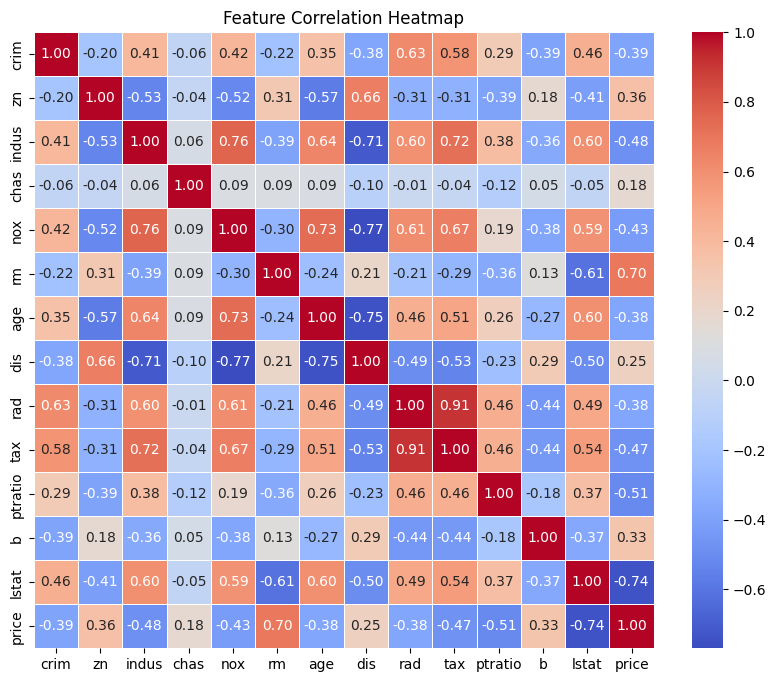

In [ ]:
# Heatmap to show correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

####Filtering out the features with correlation > 0 with target variable "Price"

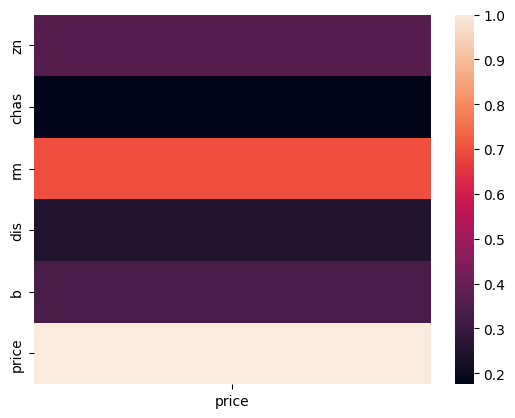

In [ ]:
positiv_corrs = df.corr()['price'][df.corr()['price'] > 0]
sns.heatmap(data=pd.DataFrame(positiv_corrs));

It seems there is high correlation between average number of rooms per dwelling and house price.

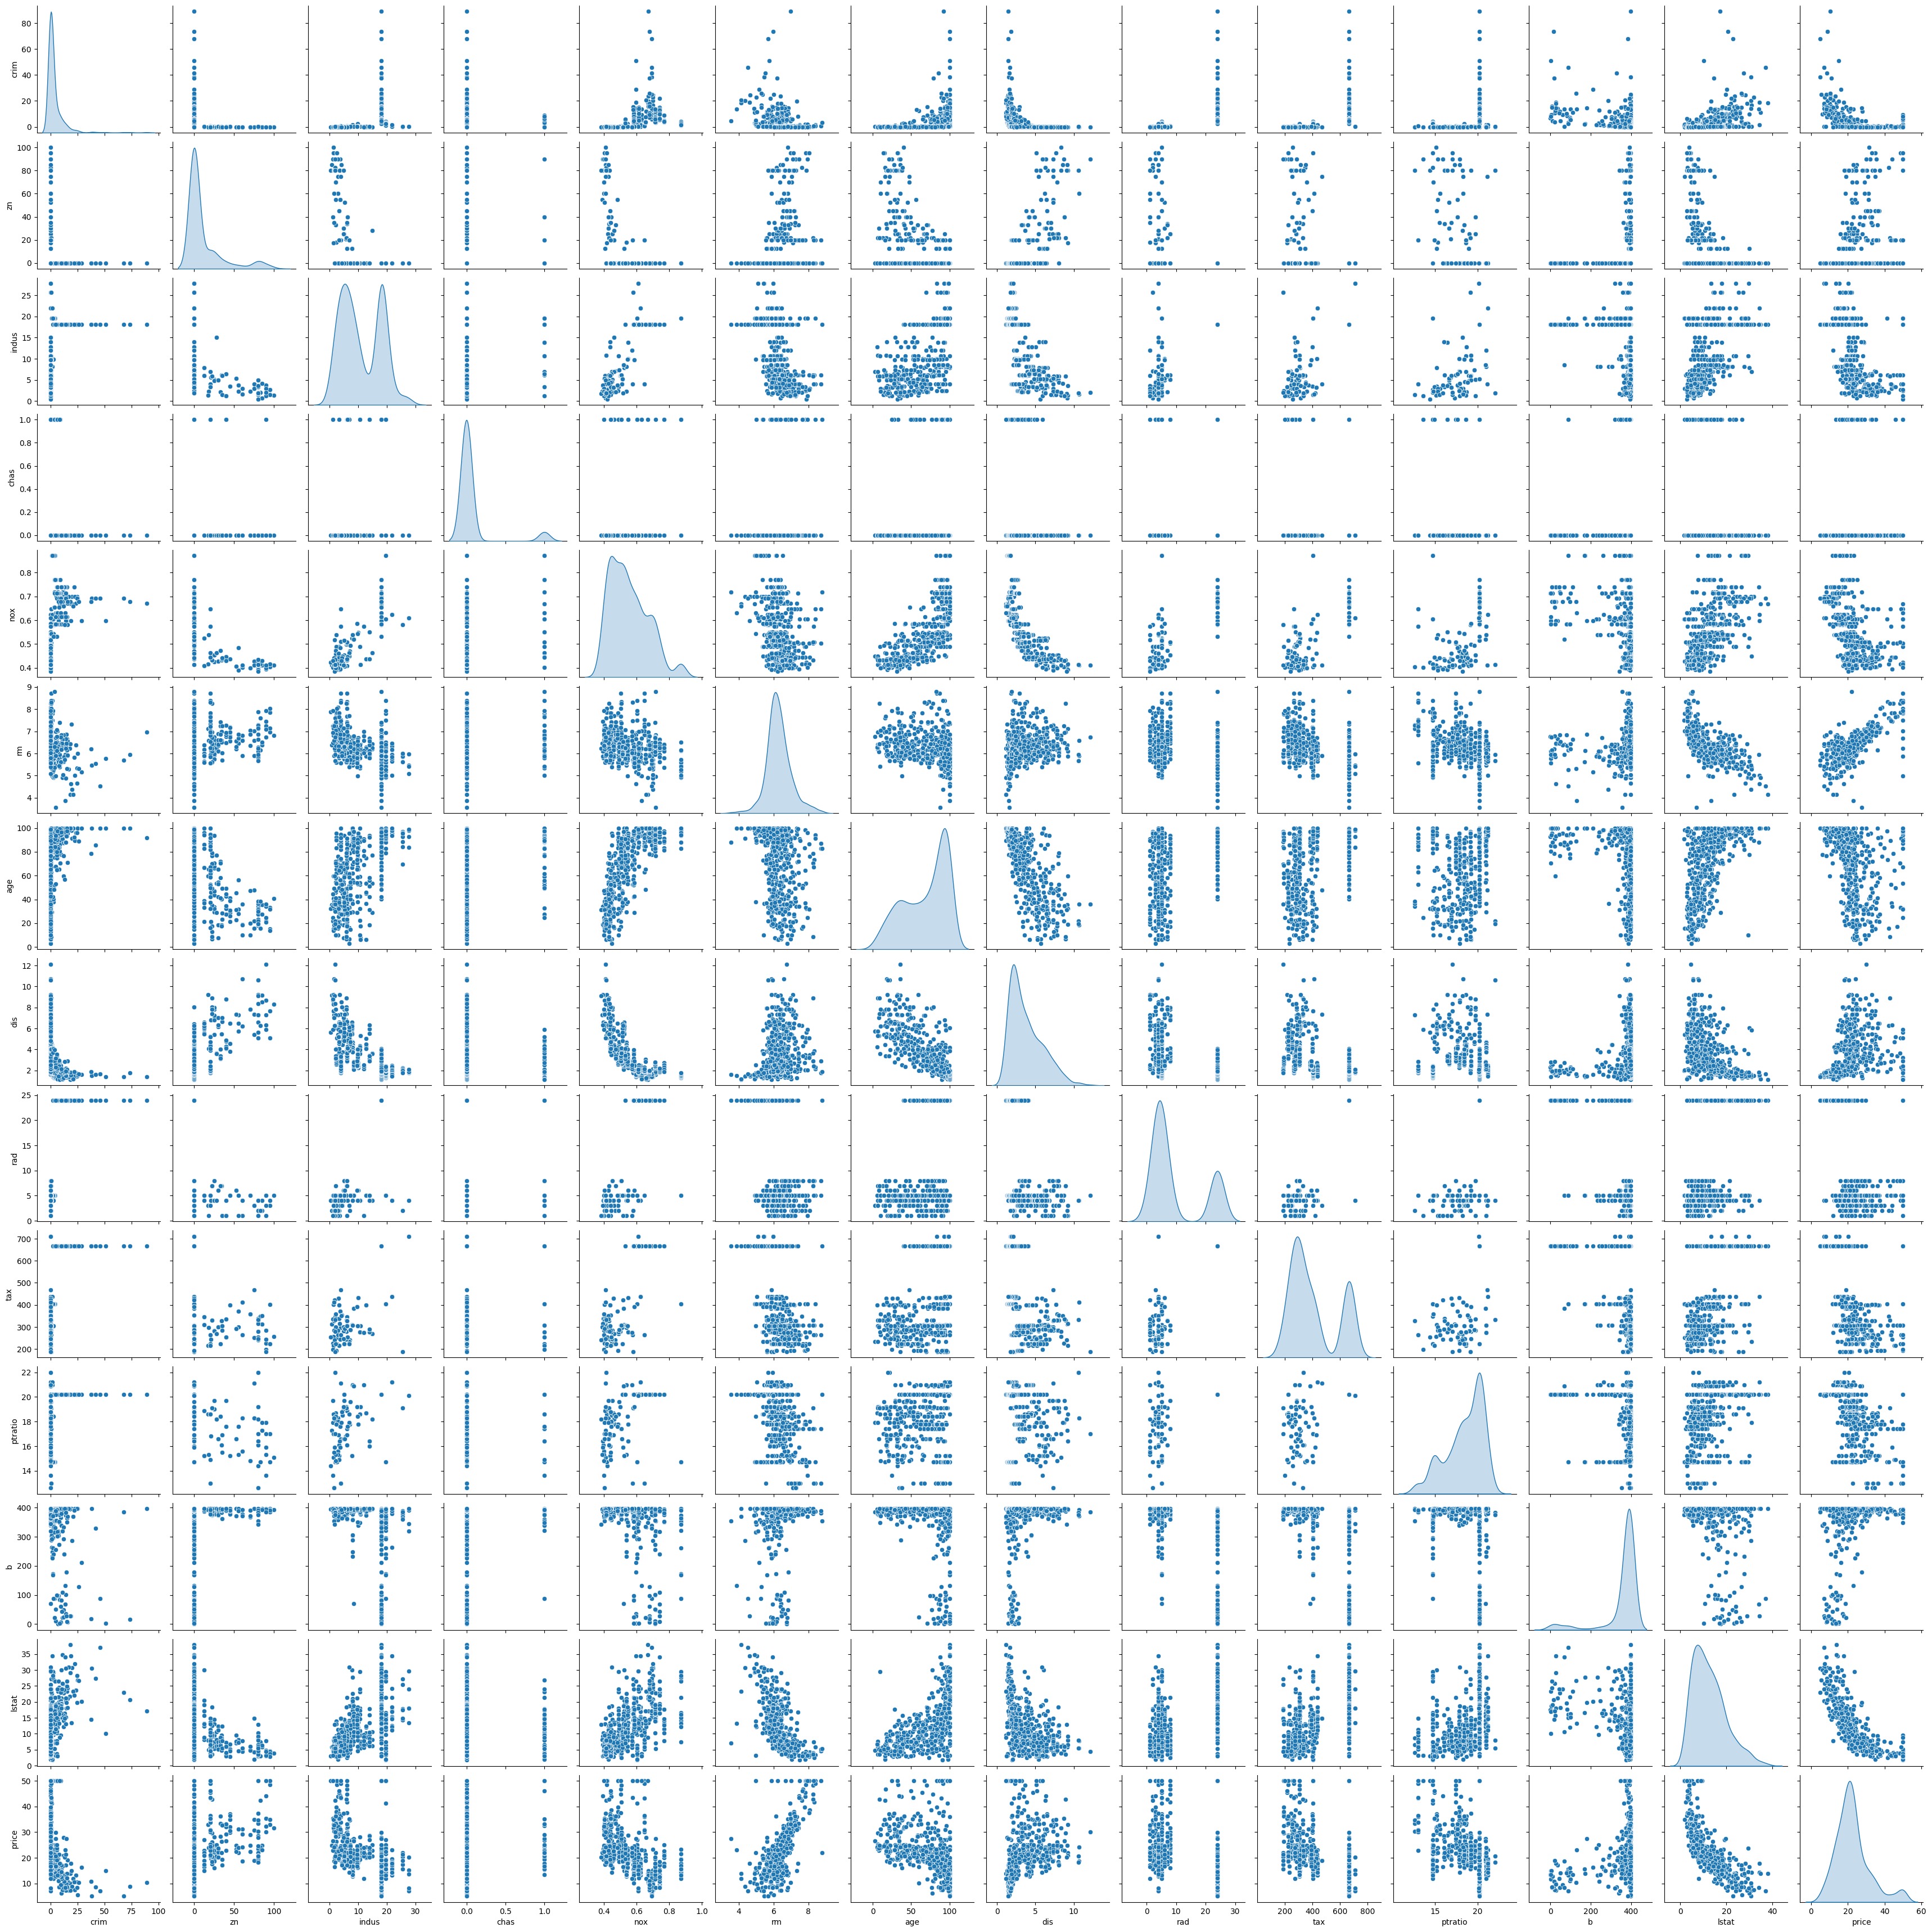

In [ ]:
# Pairplot to show relationships between all features and the target variable
sns.pairplot(df, diag_kind="kde")
plt.show()


#Now relation between each feature and the target feature "price"



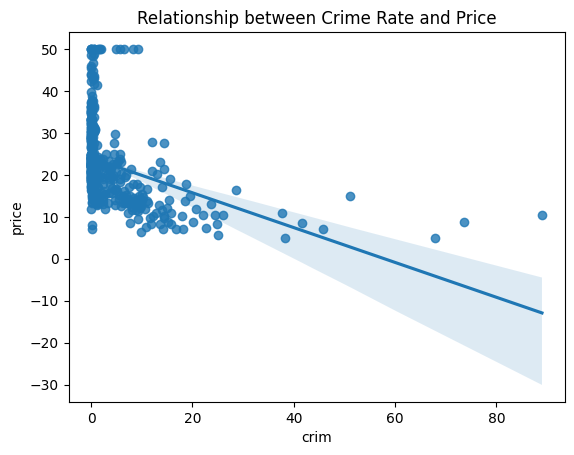

In [ ]:
# Between prices and per capita crime rate by town
sns.regplot(x="crim", y="price", data=df, fit_reg= True)
plt.title("Relationship between Crime Rate and Price")
plt.show()

As the number of crimes increases, housing prices tend to decrease, though the relationship isn’t very strong.

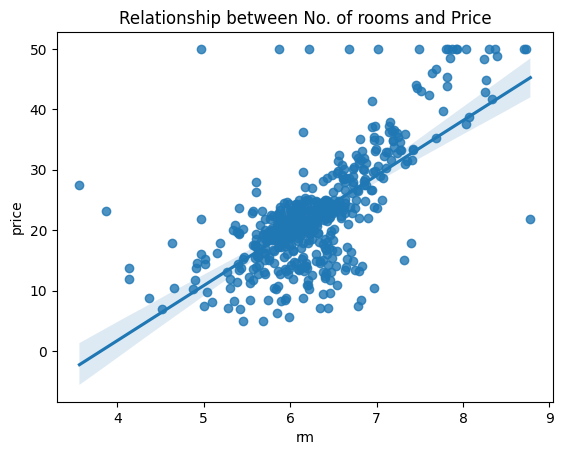

In [ ]:
# Between prices and No. of rooms
sns.regplot(x="rm",y="price", data=df, fit_reg=True)
plt.title("Relationship between No. of rooms and Price")
plt.show()

As the number of rooms in a property increases, its price generally rises, and as the number of rooms decreases, the price typically falls.

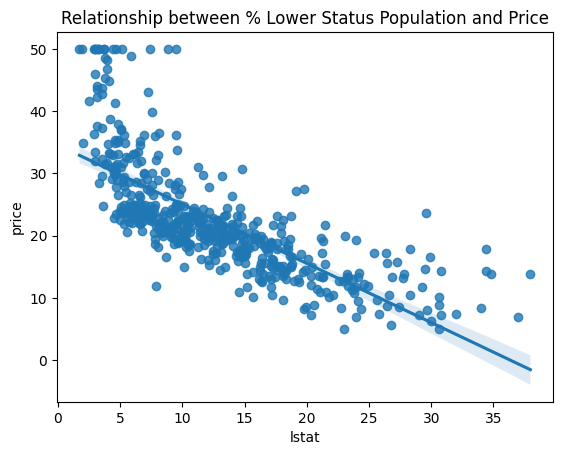

In [ ]:
# Between prices and Lower Status Population
sns.regplot(x="lstat", y="price", data=df, fit_reg= True)
plt.title("Relationship between % Lower Status Population and Price")
plt.show()

There is strong negative correlation between % lower status population and price. The status of individuals decreases, the price decreases, and as the status of individuals tends to increase, the price increases.

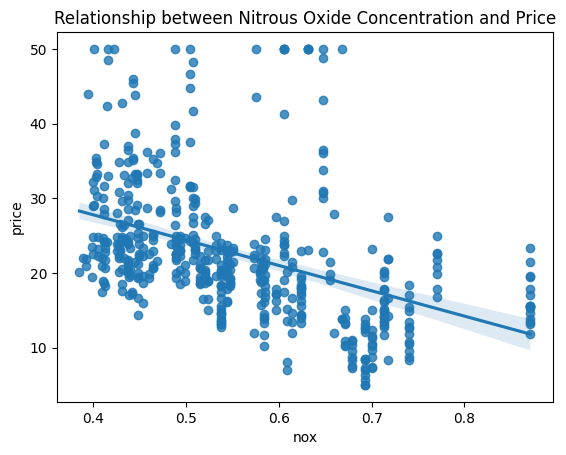

In [ ]:
# Between prices and Nitrous Oxide Concentration
sns.regplot(x="nox", y="price", data=df, fit_reg= True)
plt.title("Relationship between Nitrous Oxide Concentration and Price")
plt.show()

There is strong negative correlation between NOX concentraation in air and price. The higher the concentration of NOX in the air, the lower the housing prices, and the lower the concentration of NOX, the higher the housing prices.

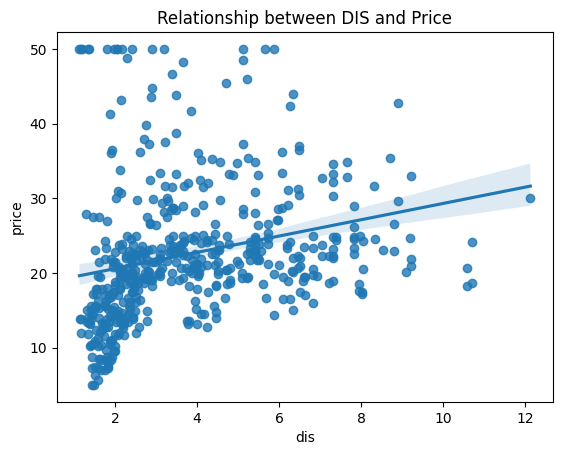

In [ ]:
# Between prices and Weighted distance between 5 Boston Employment Center
sns.regplot(x="dis", y="price", data=df, fit_reg= True)
plt.title("Relationship between DIS and Price")
plt.show()

There is strong postive correlation between distance of 5 employment center from town and price.The farther the employment centers are from the town, the higher the housing prices, and the closer the employment centers are to the town, the lower the housing prices.

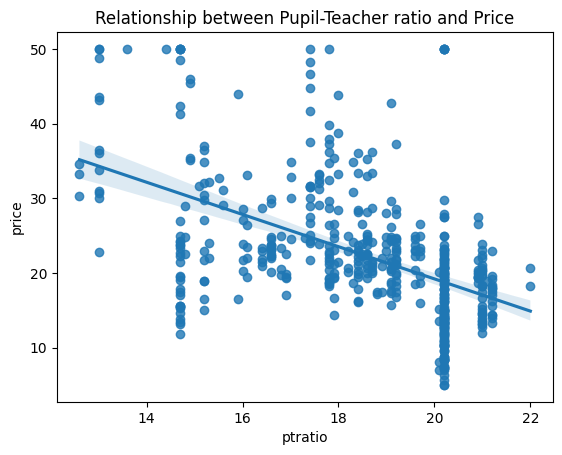

In [ ]:
# Between prices and Pupil-Teacher ratio by town
sns.regplot(x="ptratio", y="price", data=df, fit_reg= True)
plt.title("Relationship between Pupil-Teacher ratio and Price")
plt.show()

It shows the negative correlation. As the number of students per teacher increases, housing prices tend to decrease.

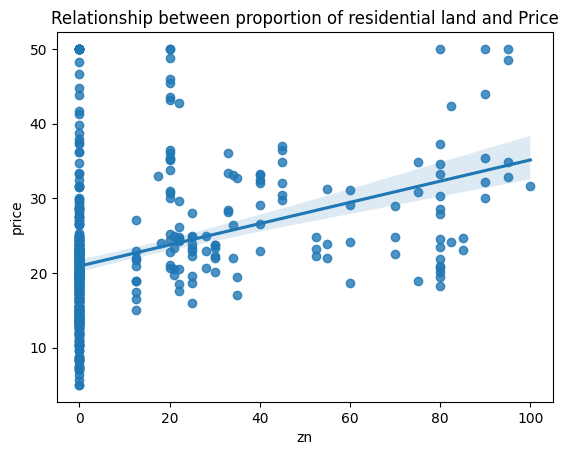

In [ ]:
# Between Proportion of residential land zoned for lots over 25,000 sq.ft. and Price
sns.regplot(x="zn",y="price", data=df, fit_reg=True)
plt.title("Relationship between proportion of residential land and Price")
plt.show()

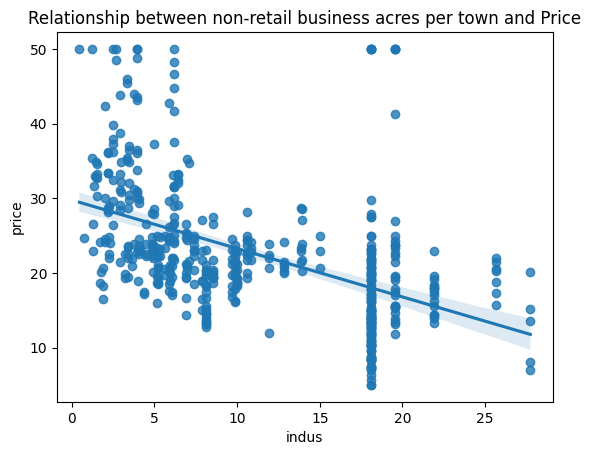

In [ ]:
# Between proportion of non-retail business acres per town and prices
sns.regplot(x="indus",y="price", data=df, fit_reg=True)
plt.title("Relationship between non-retail business acres per town and Price")
plt.show()

The number of houses are high in non industrial area.

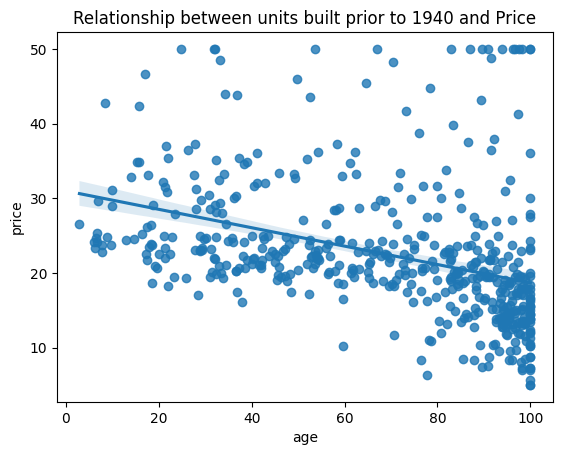

In [ ]:
# Between owner-occupied units built prior to 1940 and prices
sns.regplot(x="age",y="price", data=df, fit_reg=True)
plt.title("Relationship between units built prior to 1940 and Price")
plt.show()

As expected as the age of house increases, price decreases.

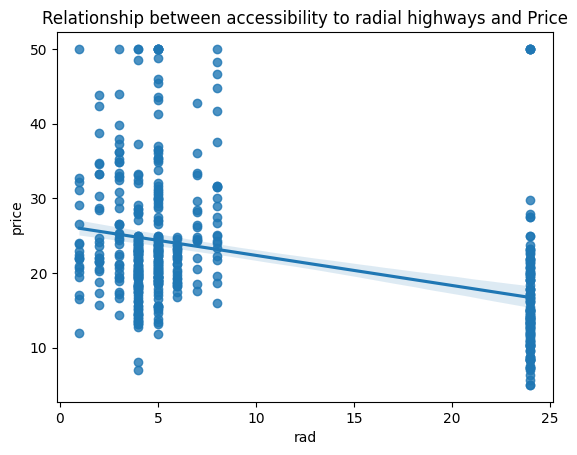

In [ ]:
# Between Index of accessibility to radial highways and prices
sns.regplot(x="rad",y="price", data=df, fit_reg=True)
plt.title("Relationship between accessibility to radial highways and Price")
plt.show()

It shows most of the houses lie away from highways.

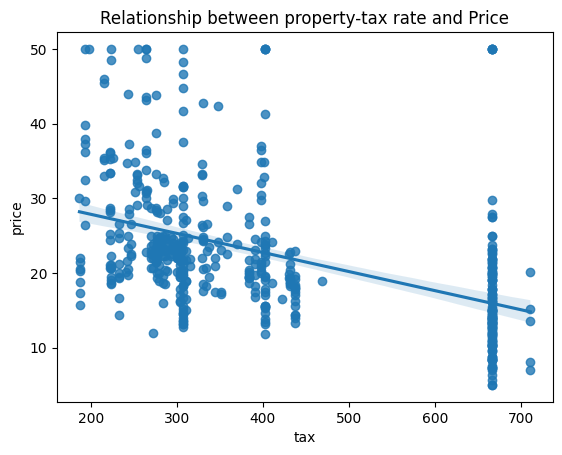

In [ ]:
# Between full-value property-tax rate per $10,000 and prices
sns.regplot(x="tax",y="price", data=df, fit_reg=True)
plt.title("Relationship between property-tax rate and Price")
plt.show()

If the tax rate are high then the prices are low.

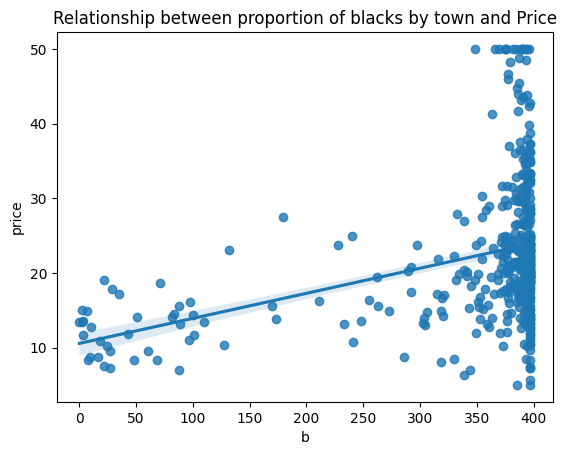

In [ ]:
# Between 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town and prices
sns.regplot(x="b",y="price", data=df, fit_reg=True)
plt.title("Relationship between proportion of blacks by town and Price")
plt.show()

#Missing Values

In [ ]:
print("\n Missing values in each column:\n")
df.isnull().sum()


 Missing values in each column:



,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


###There are no missing values.

In [ ]:
df.duplicated().sum()

np.int64(0)

There is no duplicated value.

#Outlier Detection

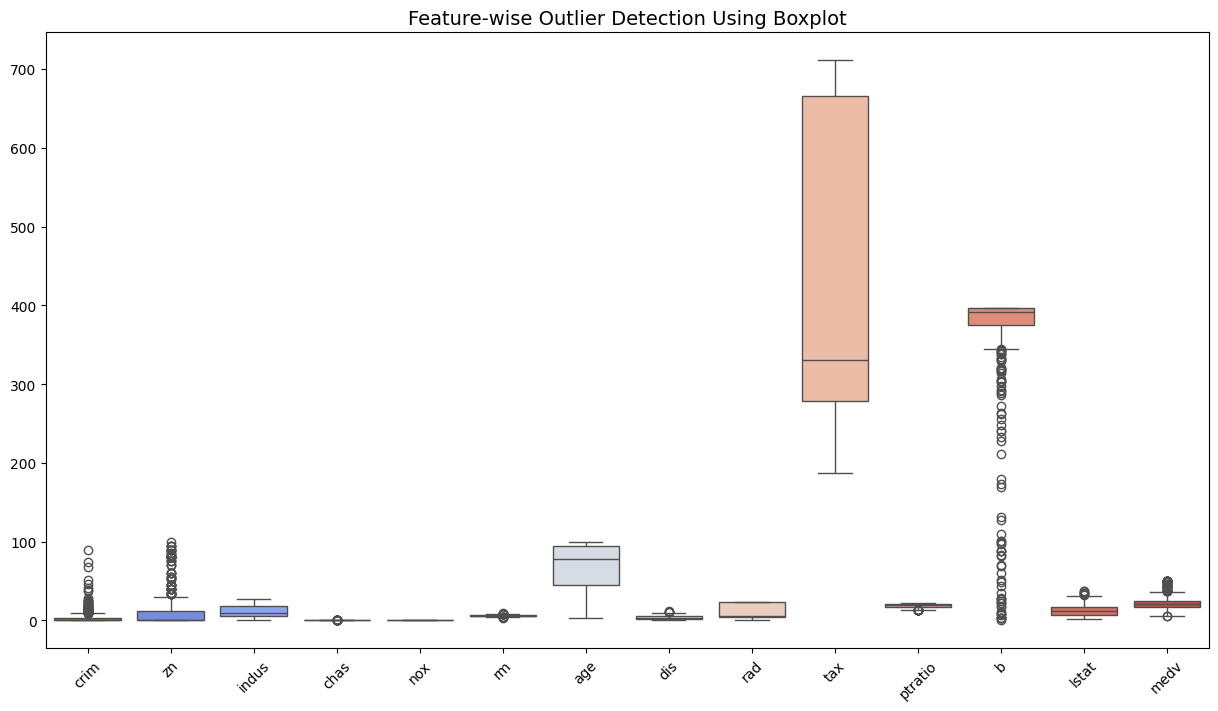

In [ ]:
# Boxplots for all numerical features

# Set figure size
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, palette="coolwarm")

plt.xticks(rotation=45)

plt.title("Feature-wise Outlier Detection Using Boxplot", fontsize=14)


plt.show()